In [40]:
# KDD data set

In [115]:
from numpy import genfromtxt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import entropy
from math import log, e
import math
from sklearn.utils import shuffle
import os
import pickle
from scipy.stats import iqr
from sklearn.model_selection import train_test_split

In [121]:
df = pd.read_csv('../Data/data_3/corrected',header=None)
len(df)

311029

In [122]:
df.head(5)


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


# Attack types 

back dos  
buffer_overflow u2r  
ftp_write r2l   
guess_passwd r2l  
imap r2l  
ipsweep probe  
land dos  
loadmodule u2r  
multihop r2l  
neptune dos  
nmap probe  
perl u2r  
phf r2l  
pod dos  
portsweep probe  
rootkit u2r  
satan probe  
smurf dos  
spy r2l  
teardrop dos  
warezclient r2l  
warezmaster r2l  




In [123]:
for i in range(1,42):
    vals = set(list(df[i]))
    print(len(vals), df[i].dtype)
    if str(df[i].dtype) == 'float64' :
        bins = 10
        labels=list(range(0,bins))
        df[i] = pd.cut(df[i], bins,labels=labels)
        print('>',set(df[i]))
    


3 object
65 object
11 object
2504 int64
9202 int64
2 int64
3 int64
4 int64
18 int64
5 int64
2 int64
24 int64
2 int64
3 int64
21 int64
12 int64
4 int64
5 int64
1 int64
2 int64
2 int64
502 int64
471 int64
94 float64
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
93 float64
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
94 float64
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
97 float64
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
79 float64
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
100 float64
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
87 float64
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
256 int64
256 int64
101 float64
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
101 float64
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
101 float64
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
58 float64
> {0, 1, 2, 3, 4, 5, 6, 7, 9}
100 float64
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
101 float64
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
101 float64
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
100 float64
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
38 object


In [124]:
normal_class = 'normal.'
anomaly_class = [
    'buffer_overflow.',
     'snmpguess.',
     'ipsweep.',
     'named.',
     'ps.',
     'xsnoop.', 
     'nmap.',
     'saint.',
     'rootkit.',
     'xterm.',
     'phf.',
     'imap.',
     'xlock.',
     'worm.',
     'satan.',
     'udpstorm.',
     'sendmail.',
     'land.',
     'httptunnel.'
]

In [125]:
df = df.rename(columns = {41:'tag'})

In [126]:
for i in set(df['tag']) :
    _list = list(df['tag'])
    c = _list.count(i)
    print('Class :', i,'| count :',c )

Class : land. | count : 9
Class : mailbomb. | count : 5000
Class : xsnoop. | count : 4
Class : neptune. | count : 58001
Class : ftp_write. | count : 3
Class : httptunnel. | count : 158
Class : xlock. | count : 9
Class : smurf. | count : 164091
Class : udpstorm. | count : 2
Class : guess_passwd. | count : 4367
Class : imap. | count : 1
Class : satan. | count : 1633
Class : buffer_overflow. | count : 22
Class : multihop. | count : 18
Class : loadmodule. | count : 2
Class : sendmail. | count : 17
Class : nmap. | count : 84
Class : back. | count : 1098
Class : perl. | count : 2
Class : teardrop. | count : 12
Class : phf. | count : 2
Class : ps. | count : 16
Class : normal. | count : 60593
Class : mscan. | count : 1053
Class : sqlattack. | count : 2
Class : worm. | count : 2
Class : apache2. | count : 794
Class : portsweep. | count : 354
Class : saint. | count : 736
Class : snmpgetattack. | count : 7741
Class : processtable. | count : 759
Class : warezmaster. | count : 1602
Class : xterm. |

In [128]:
df = df.loc[df['tag'].isin(anomaly_class) | df['tag'].isin([normal_class])]

# Convert to ids then split the df 

In [129]:
def replace_attr_with_id(row, attr, val2id_dict):
    val = row[attr]
    if val not in val2id_dict.keys():
        print(attr,val)
        return None
    else:
        return val2id_dict[val]


def convert_to_ids(df, cols , save_dir):
    domain_dims_dict = {}

    for col in cols:

        vals = list(set(df[col]))
        id2val_dict = {e[0]: e[1] for e in enumerate(vals, 0)}

        file_name = str(col) +'_id2val.pkl'
        with open( os.path.join(save_dir,file_name), 'wb') as f:
            pickle.dump(id2val_dict, f, pickle.HIGHEST_PROTOCOL)

        val2id_dict = {v: k for k, v in id2val_dict.items()}
        # replace
        df[col] = df.apply(
            replace_attr_with_id,
            axis=1,
            args=(
                col,
                val2id_dict,
            )
        )
        domain_dims_dict[col] = len(id2val_dict)

    domain_dims = []
    domain_dims_res = {}

    for col in cols:
        if col in domain_dims_dict.keys():
            print(col)
            domain_dims_res[col] = domain_dims_dict[col]
            domain_dims.append(domain_dims_dict[col])

    domain_dims =  np.array(domain_dims)
    file = 'domain_dims.pkl'
    f_path = os.path.join(save_dir, file)

    with open(f_path,'wb') as fh:
        pickle.dump(
            domain_dims_res,
            fh,
            pickle.HIGHEST_PROTOCOL
        )
    return df

In [130]:
save_dir = '../Data/data_3'
# ----- #

In [131]:
id_columns = list(df.columns)
try:
    id_columns.remove('tag')
except:
    pass

In [132]:
# ------------------------------------- #
# convert all values to int

for c in list(id_columns):
    df[c] = df[c].astype(str)  

In [133]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,tag
0,0,udp,private,SF,105,146,0,0,0,0,...,254,9,0,0,0,0,0,0,0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,9,0,0,0,0,0,0,0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,9,0,0,0,0,0,0,0,normal.
6,0,udp,domain_u,SF,29,0,0,0,0,0,...,3,2,2,2,0,0,0,0,0,normal.
7,0,udp,private,SF,105,146,0,0,0,0,...,253,9,0,0,0,0,0,0,0,normal.
9,0,tcp,http,SF,223,185,0,0,0,0,...,255,9,0,0,0,0,0,0,0,normal.
11,0,tcp,http,SF,230,260,0,0,0,0,...,255,9,0,3,0,3,0,0,0,normal.
12,0,udp,private,SF,105,146,0,0,0,0,...,254,9,0,0,0,0,0,0,0,normal.
14,1,tcp,smtp,SF,3170,329,0,0,0,0,...,39,7,1,0,0,0,0,0,1,normal.
15,0,tcp,http,SF,297,13787,0,0,0,0,...,255,9,0,0,0,0,0,0,0,normal.


In [134]:
data_df_1 = convert_to_ids(
    df, 
    id_columns , 
    save_dir
)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


In [135]:
data_df_1.head(10)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,tag
0,223,0,25,6,1090,7619,0,0,0,1,...,238,8,0,0,0,0,0,0,0,normal.
1,223,0,25,6,1090,7619,0,0,0,1,...,238,8,0,0,0,0,0,0,0,normal.
2,223,0,25,6,1090,7619,0,0,0,1,...,238,8,0,0,0,0,0,0,0,normal.
6,223,0,2,6,1552,1385,0,0,0,1,...,26,0,1,1,0,0,0,0,0,normal.
7,223,0,25,6,1090,7619,0,0,0,1,...,125,8,0,0,0,0,0,0,0,normal.
9,223,2,16,6,1738,4449,0,0,0,1,...,129,8,0,0,0,0,0,0,0,normal.
11,223,2,16,6,56,7083,0,0,0,1,...,129,8,0,9,0,9,0,0,0,normal.
12,223,0,25,6,1090,7619,0,0,0,1,...,238,8,0,0,0,0,0,0,0,normal.
14,77,2,3,6,1884,8588,0,0,0,1,...,23,4,7,0,0,0,0,0,8,normal.
15,223,2,16,6,2048,3839,0,0,0,1,...,129,8,0,0,0,0,0,0,0,normal.


## Add in id


In [136]:
# add in id
new_col = list(range(1,len(df)+1))
try: 
    data_df_1.insert(
        loc=0, 
        column='id', 
        value=new_col
    )
except:
    pass
# ------------------------------------------------------ #

In [137]:
data_df_1.head(10)

,id,0,1,2,3,4,5,6,7,8,...,32,33,34,35,36,37,38,39,40,tag
0,1,223,0,25,6,1090,7619,0,0,0,...,238,8,0,0,0,0,0,0,0,normal.
1,2,223,0,25,6,1090,7619,0,0,0,...,238,8,0,0,0,0,0,0,0,normal.
2,3,223,0,25,6,1090,7619,0,0,0,...,238,8,0,0,0,0,0,0,0,normal.
6,4,223,0,2,6,1552,1385,0,0,0,...,26,0,1,1,0,0,0,0,0,normal.
7,5,223,0,25,6,1090,7619,0,0,0,...,125,8,0,0,0,0,0,0,0,normal.
9,6,223,2,16,6,1738,4449,0,0,0,...,129,8,0,0,0,0,0,0,0,normal.
11,7,223,2,16,6,56,7083,0,0,0,...,129,8,0,9,0,9,0,0,0,normal.
12,8,223,0,25,6,1090,7619,0,0,0,...,238,8,0,0,0,0,0,0,0,normal.
14,9,77,2,3,6,1884,8588,0,0,0,...,23,4,7,0,0,0,0,0,8,normal.
15,10,223,2,16,6,2048,3839,0,0,0,...,129,8,0,0,0,0,0,0,0,normal.


In [138]:
normal_class = 'normal.'
anomaly_class = [
    'buffer_overflow.',
     'snmpguess.',
     'ipsweep.',
     'named.',
     'ps.',
     'xsnoop.', 
     'nmap.',
     'saint.',
     'rootkit.',
     'xterm.',
     'phf.',
     'imap.',
     'xlock.',
     'worm.',
     'satan.',
     'udpstorm.',
     'sendmail.',
     'land.',
     'httptunnel.'
]

In [140]:
# there are 3 classes 
# taking the majority class as normal 
# Take samples from minority class 'draw' the class(es) with minimum number of points as anomalous
# this assumption has been done in CompreX


normal_df = pd.DataFrame(data_df_1[data_df_1['tag']==normal_class],copy=True)
len(normal_df)

60593

In [149]:
# get anomalies
tmp_df = pd.DataFrame(data_df_1[data_df_1['tag'].isin(anomaly_class)],copy=True)
all_anomalies_df = pd.DataFrame(tmp_df,copy=True)
len(all_anomalies_df)

5450

In [150]:
normal_df = normal_df.sample(frac=1)
# do a 85-15 split 
test_fac = 0.15
anomaly_frac = 0.10
num_CV = 5
train_x_file = 'train_x.pkl'

In [153]:
for i in range(num_CV):
    idx = i+1
    print('---')
    print(idx)
    
    _df_1 = pd.DataFrame(df,copy=True)
    training_data, test_normal_df = train_test_split(_df_1, test_size=test_fac)
    num_anom = int(anomaly_frac*(len(test_normal_df)))
    _df = pd.DataFrame(test_normal_df,copy=True)
    tmp = all_anomalies_df.sample(num_anom)
    _df = _df.append(tmp, ignore_index=True)
    
    print(len(training_data),len(anomalies_df))
    
    test_anomaly_ids = tmp['id']
    test_all_ids = _df['id']
    try:
        del _df['tag']
        del _df['id']
    except:
        pass
    
    test_x_data = _df.values
    test_x_file = 'test_x_' + str(idx) + '.pkl'
    test_x_file_path = os.path.join(save_dir,test_x_file)
    print(test_x_file_path)
    
    with open(test_x_file_path, 'wb') as fh:
        _td = [test_anomaly_ids, test_all_ids, test_x_data ]
        pickle.dump(
            _td, 
            fh, 
            pickle.HIGHEST_PROTOCOL
        )
    
    if i == 0:
        try:
            del training_data['id']
            del training_data['tag']
        except:
            pass
        
        # Save the data
        train_x_data = training_data.values
        train_x_file_path = os.path.join(
            save_dir,
            train_x_file
        )
        print(train_x_file)
        with open(train_x_file_path, 'wb') as fh:
            pickle.dump(
                train_x_data, 
                fh, 
                pickle.HIGHEST_PROTOCOL
            )
            
        

---
1
56136 10897
../Data/data_3/test_x_1.pkl
train_x.pkl
---
2
56136 10897
../Data/data_3/test_x_2.pkl
---
3
56136 10897
../Data/data_3/test_x_3.pkl
---
4
56136 10897
../Data/data_3/test_x_4.pkl
---
5
56136 10897
../Data/data_3/test_x_5.pkl




# --------------------------------------------------------------------------- #

In [20]:
# data_df = pd.DataFrame(normal_df,copy=True)
# data_df = data_df.append(anomalies_df,ignore_index=True)

In [21]:

data_df = shuffle(data_df)

In [22]:
len(data_df)

31810

In [23]:
l1 = len(data_df[data_df['tag']==normal_class])
l2 = len(data_df)
l1 = l2-l1
print('Percentage of Anomalies :',  (l1/l2)*100 )

Percentage of Anomalies : 4.759509588179818


### Exploring the attributes


In [24]:
def entropy_calc(labels):
    n_labels = len(labels)
    if n_labels <= 1:
        return 0

    value,counts = np.unique(labels, return_counts=True)
    probs = counts / n_labels
    n_classes = np.count_nonzero(probs)

    if n_classes <= 1:
        return 0

    ent = 0.
    base = math.e 
    for i in probs:
        ent -= i * log(i, base)
    k = len(value)
    ent = ent/log(k,base)
    return ent

In [25]:
def get_entropies(df):
    # ignore 1st and last columns
    num_cols = len(df.columns)
    res = {}
    for i in range(1,num_cols-2):
        e = entropy_calc(list(df[i]))
        print(i,e)
        res[i] = e
    return res

In [26]:
attr_entropy = get_entropies(data_df)


1 0.5848077591569985
2 0.3648454189209675
3 0.04997671591426441
4 0.6909065164795006
5 0.7661992614921396
6 0
7 0.007640385879637648
8 0.0009996728752907978
9 0.01000916243722198
10 0.0012217780795575396
11 0.9165147131302933
12 0.0030246215719303715
13 0.006236793412595473
14 0.0005155569039712995
15 0.0019364496242756611
16 0.004417437045291896
17 0.0009361692301817279
18 0.020491575880043186
19 0
20 0.0009682390718552874
21 0.019504509689008045
22 0.5181601419453641
23 0.5632882331222167
24 0.032949125308026586
25 0.016607927215865785
26 0.049634613516522985
27 0.039346224392355376
28 0.061290295563141584
29 0.058766134921388054
30 0.4554762580849496
31 0.5786293318969968
32 0.4101858941669956
33 0.23963822348794708
34 0.1099091768080273
35 0.28119556397086354
36 0.09415322895394077
37 0.023994662513140527
38 0.0054154239074646615
39 0.061839288600957464
40 0.04053666706553462


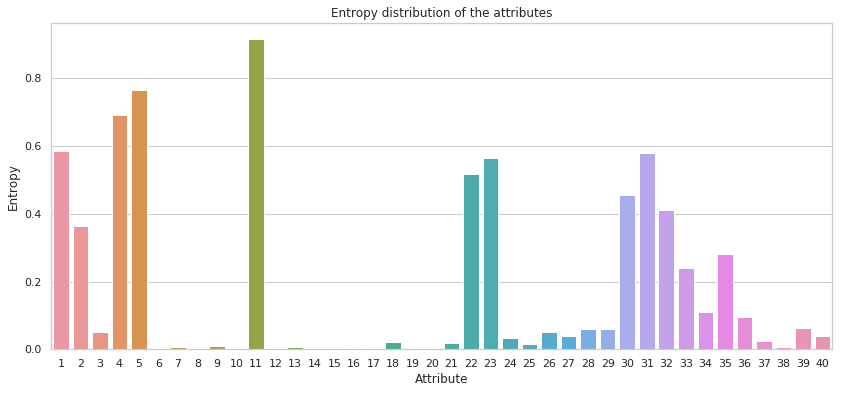

In [27]:
plt.figure(figsize=[14,6])
sns.set(style="whitegrid")
sns.barplot(x=list(attr_entropy.keys()), y=list(attr_entropy.values()))
plt.xlabel('Attribute')
plt.ylabel('Entropy')
plt.title('Entropy distribution of the attributes')
plt.show()

## Filter attributes by threshold
### lb =0.05
### ub =0.95


In [28]:

lb = 0.01
ub = 0.99
attr_list = []
for k,v in attr_entropy.items():
    if v >= lb and v <= ub:
        attr_list.append(k)
        

In [29]:
len(attr_list)

27

In [30]:
valid_attr = ['id']
valid_attr.extend(attr_list)
valid_attr.append('tag')
data_df = data_df[valid_attr]

## Explore Arity of the domains

In [31]:
def get_domain_arity(df,attr_list):
    domain_arity = {a: len(set(df[a])) for a in attr_list}
    return domain_arity

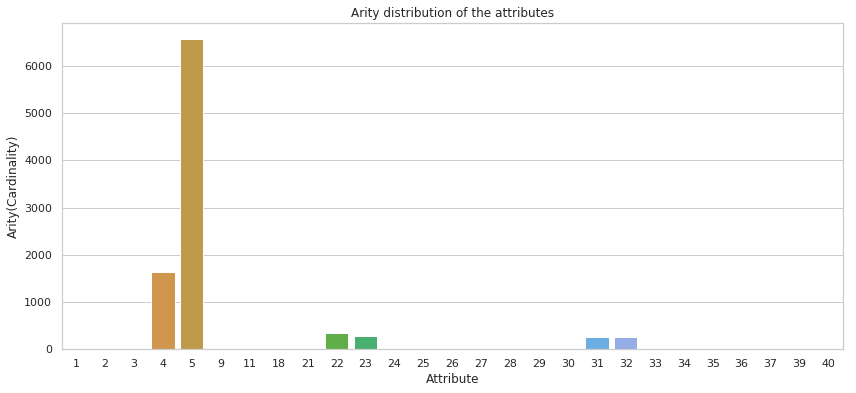

In [32]:

domain_arity = get_domain_arity(data_df,attr_list)
plt.figure(figsize=[14,6])
sns.set(style="whitegrid")
sns.barplot(x=list(domain_arity.keys()), y=list(domain_arity.values()))
plt.xlabel('Attribute')
plt.ylabel('Arity(Cardinality)')
plt.title('Arity distribution of the attributes')
plt.show()  

In [33]:
def replace_attr_with_id(row, attr, val2id_dict):
    val = row[attr]
    if val not in val2id_dict.keys():
        print(attr,val)
        return None
    else:
        return val2id_dict[val]


def convert_to_ids(df, cols , save_dir):
    domain_dims_dict = {}

    for col in cols:

        vals = list(set(df[col]))
        id2val_dict = {e[0]: e[1] for e in enumerate(vals, 0)}

        file_name = str(col) +'_id2val.pkl'
        with open( os.path.join(save_dir,file_name), 'wb') as f:
            pickle.dump(id2val_dict, f, pickle.HIGHEST_PROTOCOL)

        val2id_dict = {v: k for k, v in id2val_dict.items()}
        # replace
        df[col] = df.apply(
            replace_attr_with_id,
            axis=1,
            args=(
                col,
                val2id_dict,
            )
        )
        domain_dims_dict[col] = len(id2val_dict)

    domain_dims = []
    domain_dims_res = {}

    for col in list(df.columns):
        if col in domain_dims_dict.keys():
            print(col)
            domain_dims_res[col] = domain_dims_dict[col]
            domain_dims.append(domain_dims_dict[col])

    domain_dims =  np.array(domain_dims)
    file = 'domain_dims.pkl'
    f_path = os.path.join(save_dir, file)

    with open(f_path,'wb') as fh:
        pickle.dump(
            domain_dims_res,
            fh,
            pickle.HIGHEST_PROTOCOL
        )
    return df

In [34]:
# Save the data ina numpy array
_tmp = data_df[data_df['tag'] == normal_class]
_normal = list(_tmp['id'])


_tmp = data_df[(data_df['tag'] != normal_class)]
_anomaly =  list(_tmp['id'])


all_ids = list(data_df['id'])
record_id_dict ={
    'all':all_ids,
    'normal':_normal,
    'anomaly':_anomaly
}

In [35]:
save_dir = '../Data/data_3'

data_df_1 = pd.DataFrame(data_df,copy=True)
try:
    del data_df_1['id']
    del data_df_1['tag']
except:
    pass

# convert all values to int
for c in list(data_df_1.columns):
    data_df_1[c] = data_df_1[c].astype(str)  
cols = list(data_df_1.columns)
data_df_1 = convert_to_ids(data_df_1, cols , save_dir)
data_x = data_df_1.values
    

1
2
3
4
5
9
11
18
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
39
40


In [36]:
OP_PATH = '../Data/data_3'
data_x_file = 'data_3_x.pkl'
record_file = 'data_3_idList.pkl'

f_path_1 = os.path.join(OP_PATH,data_x_file)
f_path_2 = os.path.join(OP_PATH,record_file)

with open(f_path_1,'wb') as fh :
    pickle.dump(data_x, fh,pickle.HIGHEST_PROTOCOL)
    
with open(f_path_2,'wb') as fh :
    pickle.dump(record_id_dict, fh,pickle.HIGHEST_PROTOCOL)